In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
def sigmoid(Y_in):
    return 1 / (1 + np.exp(-Y_in))

In [3]:
def find_Yhat(X, w, b):
    # IF LIST OF LIST / LIST OF TUPLE IS USED, THEN INDIVIDUAL LIST/TUPLE SHOULD BE HANDLED DIFFERENTLY
    if type(X) in [type([1]), type((1,2))]:
        Y_in = np.dot(X, w) + b
    else:
        Y_in = X * w + b

    return sigmoid(Y_in)

In [4]:
def delta_w(X, Y_true, Y_pred):
  return -2 * (Y_true - Y_pred) * Y_pred * (1 - Y_pred) * X

In [5]:
def delta_b(Y_true, Y_pred):
  return -2 * (Y_true - Y_pred) * Y_pred * (1 - Y_pred)

In [6]:

X = [0.5, 2.5]
Y = [0.2, 0.9]

In [7]:
n_epochs = 300
df = pd.DataFrame([(x, y) for x, y in zip(X, Y)], columns = ['X', 'Y'])
df.head()

,X,Y
0,0.5,0.2
1,2.5,0.9


In [8]:
def adaDelta_RMS(X, Y, noofepochs = 300, beta = 0.5):
    w = -2; alpha = 1; b = -2;
    e = 0.1
    vw, vb = 0, 0

    # LIST FOR ALL EPOCHS
    error_mega_list = []
    weights_mega_list = []
    bias_mega_list = []
        
    for i in range(noofepochs):
        # LIST FOR EACH EPOCH
        error_list = []
        for x, y in zip(X, Y):
            Y_hat = find_Yhat(x, w, b)
            error_list.append((y - Y_hat) ** 2)

            dw = delta_w(x, y, Y_hat)
            vw = beta * vw + (1 - beta) * (dw**2)
            
            db = delta_b(y, Y_hat)
            vb = beta * vb + (1 - beta) * (db**2)

            w += (-alpha / (vw + e)**0.5) * dw
            b += (-alpha / (vb + e)**0.5) * db


        error_mega_list.append(error_list)
        weights_mega_list.append(w)
        bias_mega_list.append(b)
        
    return error_mega_list, weights_mega_list, bias_mega_list

In [9]:
errors_rms, weights_rms, biases_rms = adaDelta_RMS(X, Y, n_epochs)

In [10]:
print(round(np.mean(errors_rms[-1]),5))
print(round(weights_rms[-1],3))
print(round(biases_rms[-1],3))

0.0
1.792
-2.282


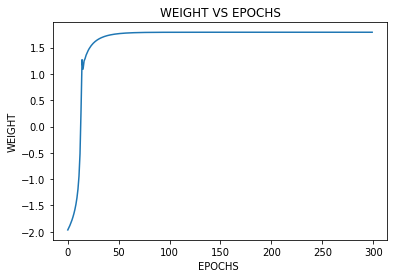

In [11]:
plt.title("WEIGHT VS EPOCHS")
epoch_range = [i for i in range(n_epochs)]
weight_range = [w for w in weights_rms]
plt.plot(epoch_range, weight_range)
plt.xlabel('EPOCHS ')
plt.ylabel('WEIGHT')
plt.show()